# Exercise 5 | Regularized Linear Regression and Bias-Variance

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
from scipy.io import loadmat
from scipy.optimize import minimize
from sklearn import preprocessing

## Part 1: Loading and Visualizing Data

We start the exercise by first loading and visualizing the
dataset. The following code will load the dataset into your
environment and plot the data.

Text(0,0.5,'Water flowing out of the dam (y)')

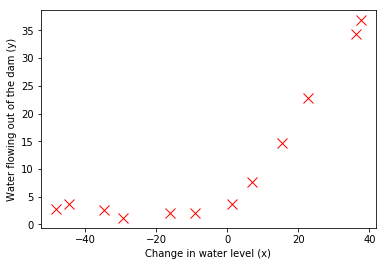

In [2]:
# Loading and Visualizing Data ...

data1 = loadmat('ex5data1.mat')

X = data1['X']
Xtest = data1['Xtest']
Xval = data1['Xval']
y = data1['y']
ytest = data1['ytest']
yval = data1['yval']

m = X.shape[0]

plt.plot(X, y, 'rx', markersize=10, linewidth=1.5)
plt.xlabel('Change in water level (x)')
plt.ylabel('Water flowing out of the dam (y)')

## Part 2: Regularized Linear Regression Cost

You should now implement the cost function for regularized linear
regression.

In [3]:
def linear_reg_cost_function(theta, X, y, lambda_):
    """Compute cost and gradient for regularized linear regression with multiple variables."""

    m = len(y)
    theta = theta.reshape(-1, 1)

    temp = X.dot(theta) - y
    J = (temp.T.dot(temp)) / (2 * m) + lambda_ / (2 * m) * np.sum(theta[1:] ** 2)

    grad = X.T.dot(temp) / m
    grad[1:] += lambda_ / m * theta[1:]

    return J, grad.flatten()

In [4]:
theta = np.array([1, 1]).reshape((2, 1))
J, _ = linear_reg_cost_function(theta, np.c_[np.ones((m, 1)), X], y, 1)

print(f'''Cost at theta = [1 ; 1]: {J}
(this value should be about 303.993192)''')

Cost at theta = [1 ; 1]: [[303.99319222]]
(this value should be about 303.993192)


## Part 3: Regularized Linear Regression Gradient

You should now implement the gradient for regularized linear regression.

In [5]:
theta = np.array([1, 1]).reshape((2, 1))
J, grad = linear_reg_cost_function(theta, np.c_[np.ones((m, 1)), X], y, 1)

print(f'''Gradient at theta = [1 ; 1]:  [{grad[0]}; {grad[1]}]
(this value should be about [-15.303016; 598.250744])''')

Gradient at theta = [1 ; 1]:  [-15.303015674201186; 598.2507441727037]
(this value should be about [-15.303016; 598.250744])


## Part 4: Train Linear Regression

Once you have implemented the cost and gradient correctly, the
trainLinearReg function will use your cost function to train
regularized linear regression.

Write Up Note: The data is non-linear, so this will not give a great fit.

In [6]:
def train_linear_reg(X, y, lambda_):
    """Trains linear regression given a dataset (X, y) and a regularization parameter lambda."""
    
    initial_theta = np.zeros((X.shape[1], 1))
    result = minimize(linear_reg_cost_function,
                      initial_theta,
                      args=(X, y, lambda_),
                      method='CG',
                      jac=True,
                      options=dict(maxiter=200))
    
    return result.x

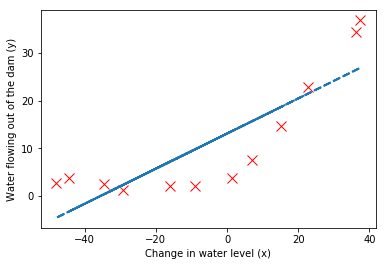

In [7]:
# Train linear regression with lambda = 0
lambda_ = 0
theta = train_linear_reg(np.c_[np.ones((m, 1)), X], y, lambda_)

# Plot fit over the data
plt.plot(X, y, 'rx', markersize=10, linewidth=1.5)
plt.xlabel('Change in water level (x)')
plt.ylabel('Water flowing out of the dam (y)')
plt.plot(X, np.c_[np.ones((m, 1)), X].dot(theta), '--', linewidth=2)

## Part 5: Learning Curve for Linear Regression

In [8]:
def learning_curve(X, y, Xval, yval, lambda_):
    """Generates the train and cross validation set errors needed to plot a learning curve"""

    m = X.shape[0]
    error_train = np.zeros((m, 1))
    error_val = np.zeros((m, 1))

    for i in range(m):
        theta_i = train_linear_reg(X[:i+1], y[:i+1], lambda_)
        error_train[i], _ = linear_reg_cost_function(theta_i, X[:i+1], y[:i+1], 0)
        error_val[i], _ = linear_reg_cost_function(theta_i, Xval, yval, 0)

    return error_train, error_val

,Train Error,Cross Validation Error
0,3.944305e-31,205.121096
1,6.409495e-31,110.300366
2,3.286595e+00,45.010232
3,2.842678e+00,48.368911
4,1.315405e+01,35.865141
5,1.944396e+01,33.829957
6,2.009852e+01,31.970987
7,1.817286e+01,30.862446
8,2.260941e+01,31.135998
9,2.326146e+01,28.936207


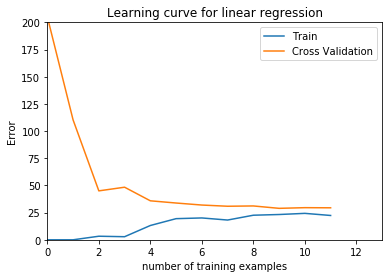

In [9]:
lambda_ = 0
error_train, error_val = learning_curve(np.c_[np.ones((m, 1)), X], y,
                                        np.c_[np.ones((Xval.shape[0], 1)), Xval], yval,
                                        lambda_)

plt.plot(range(m), error_train, range(m), error_val)
plt.title('Learning curve for linear regression')
plt.legend(['Train', 'Cross Validation'])
plt.xlabel('number of training examples')
plt.ylabel('Error')
plt.axis([0, 13, 0, 200])

df = pd.DataFrame({#'Training Examples': range(m),
                   'Train Error': error_train.flatten(),
                   'Cross Validation Error': error_val.flatten()})
df[['Train Error', 'Cross Validation Error']]

# Part 6: Feature Mapping for Polynomial Regression

One solution to this is to use polynomial regression. You should now
complete polyFeatures to map each example into its powers.

In [10]:
p = 8

# Map X onto Polynomial Features and Normalize
poly8 = preprocessing.PolynomialFeatures(p, include_bias=False)
X_poly = poly8.fit_transform(X)
scaler = preprocessing.StandardScaler().fit(X_poly)  # save for later
X_poly = scaler.transform(X_poly)
X_poly = np.c_[np.ones((m, 1)), X_poly]  # add interceptor

# Map X_poly_test and normalize
X_poly_test = poly8.fit_transform(Xtest)
X_poly_test = scaler.transform(X_poly_test)
X_poly_test = np.c_[np.ones((Xtest.shape[0], 1)), X_poly_test]

# Map X_poly_val and normalize
X_poly_val = poly8.fit_transform(Xval)
X_poly_val = scaler.transform(X_poly_val)
X_poly_val = np.c_[np.ones((Xval.shape[0], 1)), X_poly_val]

print(f'''Normalized Training Example 1:
{X_poly[0]}''')

Normalized Training Example 1:
[ 1.         -0.3782437  -0.78866232  0.19032872 -0.7375913   0.32025197
 -0.6171516   0.35983501 -0.53109126]


# Part 7: Learning Curve for Polynomial Regression

Now, you will get to experiment with polynomial regression with
multiple values of lambda. The code below runs polynomial regression
with lambda = 0. You should try running the code with different values
of lambda to see how the fit and learning curve change.

In [11]:
lambda_ = 0
theta = train_linear_reg(X_poly, y, lambda_)

Polynomial Regression (lambda = 0.000000)


,Train Error,Cross Validation Error
0,9.860761e-32,161.442168
1,2.517083e-28,160.792292
2,4.617443e-11,67.084922
3,2.959583e-21,67.726849
4,1.039297e-17,6.616987
5,1.165976e-15,10.643063
6,1.333938e-07,28.020806
7,4.935675e-05,23.662208
8,1.230288e-01,8.220899
9,1.780069e-02,53.473019


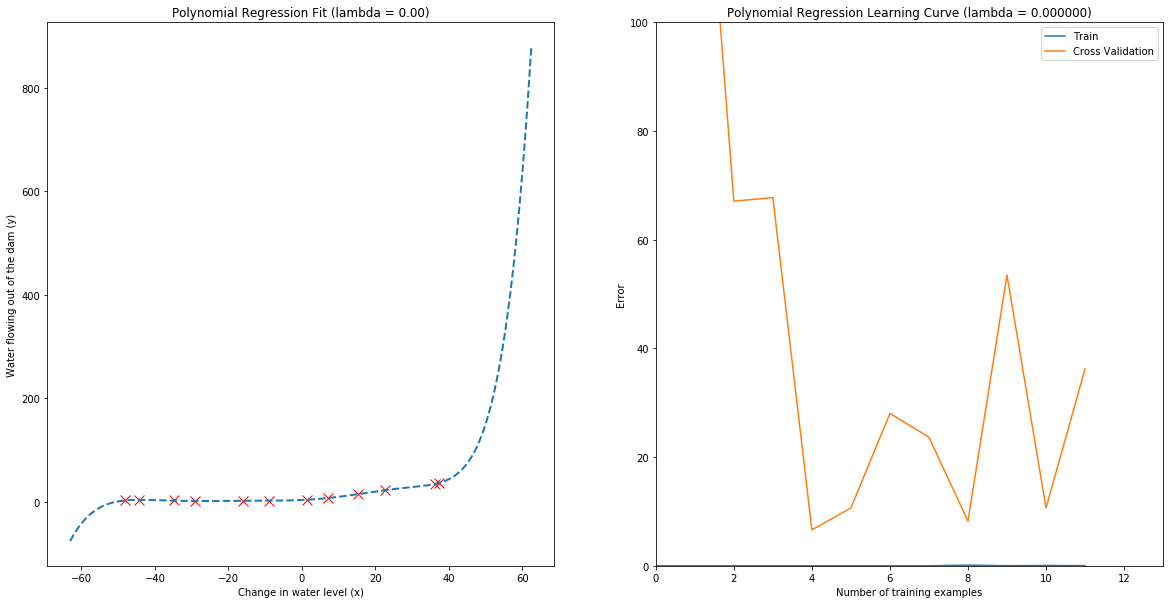

In [12]:
# draw two chart side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

ax1.plot(X, y, 'rx', markersize=10, linewidth=1.5)

# plot fit
# We plot a range slightly bigger than the min and max values to get
# an idea of how the fit will vary outside the range of the data
# points.
X_fit = np.arange(np.min(X) - 15, np.max(X) + 25, 0.05, dtype=np.float).reshape((-1, 1))
X_poly_fit = poly8.fit_transform(X_fit)
X_poly_fit = scaler.transform(X_poly_fit)
X_poly_fit = np.c_[np.ones((X_fit.shape[0], 1)), X_poly_fit]

ax1.plot(X_fit, X_poly_fit.dot(theta), '--', linewidth=2)
ax1.set_xlabel('Change in water level (x)')
ax1.set_ylabel('Water flowing out of the dam (y)')
ax1.set_title(f'Polynomial Regression Fit (lambda = {lambda_:.2f})')

error_train, error_val = learning_curve(X_poly, y, X_poly_val, yval, lambda_)
ax2.plot(range(m), error_train, range(m), error_val)
ax2.set_title(f'Polynomial Regression Learning Curve (lambda = {lambda_:f})')
ax2.set_xlabel('Number of training examples')
ax2.set_ylabel('Error')
ax2.axis([0, 13, 0, 100])
ax2.legend(['Train', 'Cross Validation'])

print(f'Polynomial Regression (lambda = {lambda_:f})')
df = pd.DataFrame({'Train Error': error_train.flatten(),
                   'Cross Validation Error': error_val.flatten()})
df[['Train Error', 'Cross Validation Error']]

# Part 8: Validation for Selecting Lambda

You will now implement validationCurve to test various values of
lambda on a validation set. You will then use this to select the
**best** lambda value.

In [13]:
def validation_curve(X, y, Xval, yval):
    lambda_vec = np.array([0, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10]).reshape((-1, 1))

    m = lambda_vec.shape[0]
    error_train = np.zeros((m, 1))
    error_val = np.zeros((m, 1)) 

    for i in range(m):
        theta = train_linear_reg(X, y, lambda_vec[i, 0])
        error_train[i], _ = linear_reg_cost_function(theta, X, y, 0)
        error_val[i], _ = linear_reg_cost_function(theta, Xval, yval, 0)

    return lambda_vec, error_train, error_val

,lambda,Train Error,Validation Error
0,0.000,0.031478,36.208981
1,0.001,0.126644,11.858447
2,0.003,0.166746,15.916646
3,0.010,0.217889,17.142670
4,0.030,0.275148,13.217171
5,0.100,0.438650,7.927129
6,0.300,0.868168,4.760805
7,1.000,1.958695,4.263359
8,3.000,4.525105,3.832176
9,10.000,14.825808,8.889725


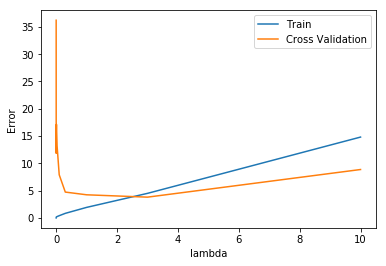

In [14]:
lambda_vec, error_train, error_val = validation_curve(X_poly, y, X_poly_val, yval)

plt.plot(lambda_vec, error_train, lambda_vec, error_val)
plt.legend(['Train', 'Cross Validation'])
plt.xlabel('lambda')
plt.ylabel('Error')

df = pd.DataFrame({'lambda': lambda_vec.flatten(),
                   'Train Error': error_train.flatten(),
                   'Validation Error': error_val.flatten()})
df[['lambda', 'Train Error', 'Validation Error']]